# **Part 1 - Preprocessing**

In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import gensim
import string
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import TweetTokenizer
from nltk.stem import *
import re
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
import nltk
import warnings
warnings.filterwarnings("ignore")

For this csv file we need to use "latin1" encoding



In [2]:
data = pd.read_csv("/content/drive/MyDrive/Data_Colab/gender-classifier-DFE-791531.csv", encoding = "latin-1")

In [3]:
data.columns

Index(['_unit_id', '_golden', '_unit_state', '_trusted_judgments',
       '_last_judgment_at', 'gender', 'gender:confidence', 'profile_yn',
       'profile_yn:confidence', 'created', 'description', 'fav_number',
       'gender_gold', 'link_color', 'name', 'profile_yn_gold', 'profileimage',
       'retweet_count', 'sidebar_color', 'text', 'tweet_coord', 'tweet_count',
       'tweet_created', 'tweet_id', 'tweet_location', 'user_timezone'],
      dtype='object')

In [4]:
## We can drop unnecessary columns like ["_last_judgment_at"]

data = data[["description", "text", "gender", "gender:confidence","profile_yn"]]

In [5]:
data

,description,text,gender,gender:confidence,profile_yn
0,i sing my own rhythm.,Robbie E Responds To Critics After Win Against...,male,1.0000,yes
1,I'm the author of novels filled with family dr...,ÛÏIt felt like they were my friends and I was...,male,1.0000,yes
2,louis whining and squealing and all,i absolutely adore when louis starts the songs...,male,0.6625,yes
3,"Mobile guy. 49ers, Shazam, Google, Kleiner Pe...",Hi @JordanSpieth - Looking at the url - do you...,male,1.0000,yes
4,Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...,Watching Neighbours on Sky+ catching up with t...,female,1.0000,yes
...,...,...,...,...,...
20045,(rp),"@lookupondeath ...Fine, and I'll drink tea too...",female,1.0000,yes
20046,"Whatever you like, it's not a problem at all. ...",Greg Hardy you a good player and all but don't...,male,1.0000,yes
20047,#TeamBarcelona ..You look lost so you should f...,You can miss people and still never want to se...,male,1.0000,yes
20048,Anti-statist; I homeschool my kids. Aspiring t...,@bitemyapp i had noticed your tendency to pee ...,female,0.8489,yes


In [6]:
data = data[data["gender"] != "unknown"]

In [7]:
data.reset_index(drop=True)

,description,text,gender,gender:confidence,profile_yn
0,i sing my own rhythm.,Robbie E Responds To Critics After Win Against...,male,1.0000,yes
1,I'm the author of novels filled with family dr...,ÛÏIt felt like they were my friends and I was...,male,1.0000,yes
2,louis whining and squealing and all,i absolutely adore when louis starts the songs...,male,0.6625,yes
3,"Mobile guy. 49ers, Shazam, Google, Kleiner Pe...",Hi @JordanSpieth - Looking at the url - do you...,male,1.0000,yes
4,Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...,Watching Neighbours on Sky+ catching up with t...,female,1.0000,yes
...,...,...,...,...,...
18928,(rp),"@lookupondeath ...Fine, and I'll drink tea too...",female,1.0000,yes
18929,"Whatever you like, it's not a problem at all. ...",Greg Hardy you a good player and all but don't...,male,1.0000,yes
18930,#TeamBarcelona ..You look lost so you should f...,You can miss people and still never want to se...,male,1.0000,yes
18931,Anti-statist; I homeschool my kids. Aspiring t...,@bitemyapp i had noticed your tendency to pee ...,female,0.8489,yes


In [8]:
data.dropna(subset=['gender'], inplace=True)

In [9]:
## Map gender values --> male:0 women:1 brand:2
data = data.replace({'male': 0, "female":1, "brand": 2})
data['gender'] = data['gender'].astype(int)
data

,description,text,gender,gender:confidence,profile_yn
0,i sing my own rhythm.,Robbie E Responds To Critics After Win Against...,0,1.0000,yes
1,I'm the author of novels filled with family dr...,ÛÏIt felt like they were my friends and I was...,0,1.0000,yes
2,louis whining and squealing and all,i absolutely adore when louis starts the songs...,0,0.6625,yes
3,"Mobile guy. 49ers, Shazam, Google, Kleiner Pe...",Hi @JordanSpieth - Looking at the url - do you...,0,1.0000,yes
4,Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...,Watching Neighbours on Sky+ catching up with t...,1,1.0000,yes
...,...,...,...,...,...
20045,(rp),"@lookupondeath ...Fine, and I'll drink tea too...",1,1.0000,yes
20046,"Whatever you like, it's not a problem at all. ...",Greg Hardy you a good player and all but don't...,0,1.0000,yes
20047,#TeamBarcelona ..You look lost so you should f...,You can miss people and still never want to se...,0,1.0000,yes
20048,Anti-statist; I homeschool my kids. Aspiring t...,@bitemyapp i had noticed your tendency to pee ...,1,0.8489,yes


In [10]:
## Number of rows with less than 66% Gender confidence

less = data.apply(lambda x: 1 if x["gender:confidence"] < 0.66 else 0, axis=1)
less.sum()

1764

In [11]:
## We can drop rows with gender confidence less than 0.65 (1424 out of 20050 is about 7 percent of total amount) and then drop the column.
data = data[data["gender:confidence"] > 0.65]
data.drop(columns = ["gender:confidence"], inplace=True)

In [12]:
data.reset_index(drop=True, inplace=True)

In [13]:
drop_items_idx = data[data['profile_yn'] == 'no'].index
data.drop (index = drop_items_idx, inplace = True)
print (data['profile_yn'].value_counts())
data.drop (columns = ['profile_yn'], inplace = True)

yes    17801
Name: profile_yn, dtype: int64


### EDA - Data summary

In [14]:
# Data Summary 
print (data['gender'].value_counts())
data.info()

1    6426
0    5831
2    5544
Name: gender, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 17801 entries, 0 to 17800
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   description  14696 non-null  object
 1   text         17801 non-null  object
 2   gender       17801 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 556.3+ KB


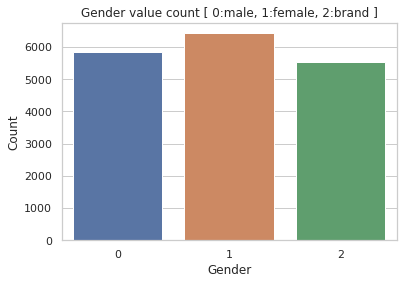

In [15]:
## Gender value count

ax = sns.set_theme(style="whitegrid")
ax = sns.countplot(x=data["gender"])
ax.set(xlabel='Gender',
       ylabel='Count',
       title='Gender value count [ 0:male, 1:female, 2:brand ]')
plt.show()

In [16]:
data.isna().sum()

description    3105
text              0
gender            0
dtype: int64

## **Text Processing**

In [17]:
nltk.download('stopwords')
nltk.download('wordnet')
stopword = nltk.corpus.stopwords.words('english')
nltk.download('omw-1.4')
lemmatizer = nltk.stem.WordNetLemmatizer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


### Text Cleaning

In [18]:
# Handling Null values
data["text"].fillna("", inplace=True)
data["description"].fillna("",inplace=True)

Concat text and description columns to one column for better cleaning as a plain text!

In [19]:
# Letter Casing
data["text"] = data["text"].apply(lambda s: s.lower())
data["description"] = data["description"].apply(lambda s: s.lower())

In [20]:
data['text_description'] = data['text'].str.cat(data['description'], sep=' ')

In [21]:
clean_data = data[['text_description','gender']]

In [22]:
clean_data

,text_description,gender
0,robbie e responds to critics after win against...,0
1,ûïit felt like they were my friends and i was...,0
2,i absolutely adore when louis starts the songs...,0
3,hi @jordanspieth - looking at the url - do you...,0
4,watching neighbours on sky+ catching up with t...,1
...,...,...
17796,"@lookupondeath ...fine, and i'll drink tea too...",1
17797,greg hardy you a good player and all but don't...,0
17798,you can miss people and still never want to se...,0
17799,@bitemyapp i had noticed your tendency to pee ...,1


In [23]:
## Remove Hashtags - Mentions - Links

def cleaning(s):
    s = str(s)
    s = s.lower()
    s = re.sub("\d+", "", s)
    s = re.sub('\s+',' ',s)
    s = re.sub("@[A-Za-z0-9_]+","", s)
    s = re.sub("#[A-Za-z0-9_]+","", s)
    s = re.sub("https://t\.co/[A-Za-z0-9]+","", s)
    s = re.sub('[!$_]', "", s)    
    s = s.replace(",","")
    s = s.replace("(","")
    s = s.replace(")","")
    return s
clean_data['text_description'] = [cleaning(s) for s in clean_data['text_description']]

In [24]:
## Remove short length words
clean_data["text_description"] = clean_data["text_description"].apply(lambda x: ' '.join([w for w in x.split() if len(w) > 3]))

In [25]:
clean_data.head(10)

,text_description,gender
0,robbie responds critics after against eddie ed...,0
1,ûïit felt like they were friends living story...,0
2,absolutely adore when louis starts songs hits ...,0
3,looking don't typically advanced user mobile g...,0
4,watching neighbours sky+ catching with neighbs...,1
5,seen people train with lamps chairs don't know,1
6,thank your patience while take care issue glob...,2
7,gala bingo clubs bought å£m: uk's largest high...,0
8,defines fangirls/fanboys shippers crazy about ...,1
9,just lovely tree this year never seen gorgeous...,1


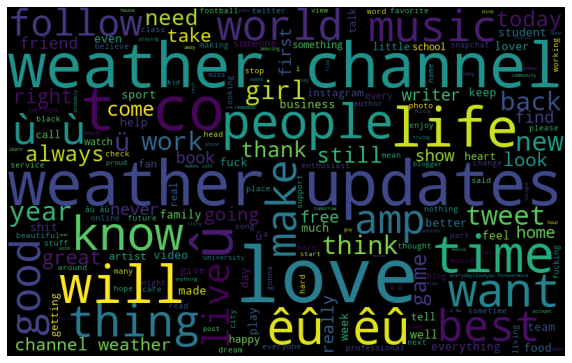

In [26]:
# Word cloud
from wordcloud import WordCloud

all_words = ' '.join([text for text in clean_data['text_description']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [27]:
# Tokenizing texts
clean_data["text_description"] = clean_data["text_description"].apply(lambda s: TweetTokenizer().tokenize(s))

In [28]:
## Remove punctuations
clean_data["text_description"] = clean_data["text_description"].apply(lambda l: [s.translate(str.maketrans('','',string.punctuation)) for s in l])

In [29]:
# Noise Removal
clean_data["text_description"] = clean_data["text_description"].apply(lambda l: [s for s in l if s.isalpha()])

In [30]:
## Remove stopwords 
clean_data["text_description"] = clean_data["text_description"].apply(lambda l: [s for s in l if s not in stopword])

In [31]:
## Lemmatization
clean_data["text_description"] = clean_data["text_description"].apply(lambda l: [PorterStemmer().stem(s) for s in l])

In [32]:
clean_data

,text_description,gender
0,"[robbi, respond, critic, eddi, edward, sing, r...",0
1,"[ûïit, felt, like, friend, live, stori, û, aut...",0
2,"[absolut, ador, loui, start, song, hit, hard, ...",0
3,"[look, dont, typic, advanc, user, mobil, guy, ...",0
4,"[watch, neighbour, sky, catch, neighb, ù, äù, ...",1
...,...,...
17796,"[fine, ill, drink, love]",1
17797,"[greg, hardi, good, player, dont, face, bryant...",0
17798,"[miss, peopl, still, never, want, look, lost, ...",0
17799,"[notic, tendenc, carpet, didnt, want, anyth, a...",1


### Text Analysis

In [33]:
Male = clean_data[clean_data['gender'] == 0]
Female = clean_data[clean_data['gender'] == 1]
Brand = clean_data[clean_data['gender'] == 2]

In [34]:
## Word Frequency Count Based On Gender
Male_Words = pd.Series(' '.join(Male['text_description'].astype(str)).lower().split(" ")).value_counts()[:20]
Female_Words = pd.Series(' '.join(Female['text_description'].astype(str)).lower().split(" ")).value_counts()[:20]
Brand_Words = pd.Series(' '.join(Brand['text_description'].astype(str)).lower().split(" ")).value_counts()[:20]

In [35]:
Male_Words

'love',      540
'like',      477
'êû',        438
'make',      331
'dont',      321
'time',      317
'û',         298
'life',      295
'ù',         280
'follow',    264
'ü',         247
'music',     239
'live',      238
'good',      225
'game',      224
'work',      222
'peopl',     220
'know',      216
'year',      214
'want',      201
dtype: int64

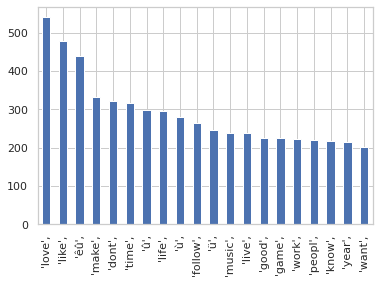

In [36]:
Male_Words.plot(kind='bar',stacked=True)

In [37]:
Female_Words

'ù',         820
'love',      766
'like',      613
'ü',         493
'make',      435
'û',         424
'life',      361
'dont',      361
'time',      357
'follow',    324
'girl',      285
'live',      271
'peopl',     261
'want',      251
'ü']         247
'thing',     244
'know',      236
'work',      229
'best',      218
'look',      215
dtype: int64

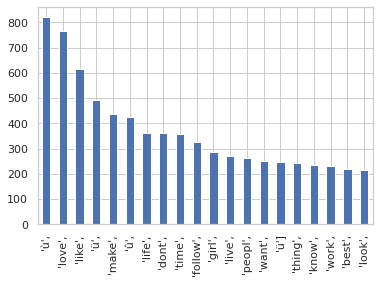

In [38]:
Female_Words.plot(kind='bar',stacked=True)

In [39]:
Brand_Words

'updat',       1325
'weather',     1119
['weather',    1105
'channel']      992
'news',         537
'follow',       358
'û',            351
'make',         256
'love',         237
'best',         220
'tweet',        215
'game',         203
'help',         202
'world',        195
'twitter',      194
'free',         191
'channel',      190
'like',         189
'offici',       184
'latest',       182
dtype: int64

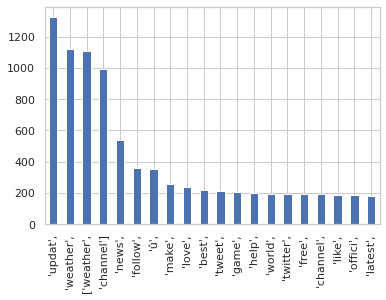

In [40]:
Brand_Words.plot(kind='bar',stacked=True)

# Part 2 - Model development

In [41]:
clean_data

,text_description,gender
0,"[robbi, respond, critic, eddi, edward, sing, r...",0
1,"[ûïit, felt, like, friend, live, stori, û, aut...",0
2,"[absolut, ador, loui, start, song, hit, hard, ...",0
3,"[look, dont, typic, advanc, user, mobil, guy, ...",0
4,"[watch, neighbour, sky, catch, neighb, ù, äù, ...",1
...,...,...
17796,"[fine, ill, drink, love]",1
17797,"[greg, hardi, good, player, dont, face, bryant...",0
17798,"[miss, peopl, still, never, want, look, lost, ...",0
17799,"[notic, tendenc, carpet, didnt, want, anyth, a...",1


In [42]:
# split the dataset in train and test
X = clean_data['text_description']
y = clean_data['gender']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

X_train.head()
X_train.isnull().values.any() # To make sure there is no null value

False

In [43]:
## Using Count Vectorizer (BOW)
def identity_tokenizer(text):
    return text

cv = CountVectorizer(tokenizer=identity_tokenizer, stop_words='english', lowercase=False, max_features = 10000)

sparce_matrix = cv.fit(clean_data['text_description'])

Train_X_cv = sparce_matrix.transform(X_train)
Test_X_cv = sparce_matrix.transform(X_test)

In [44]:
# Support Vector Machine Implementation
### SVM with Linear kernel
SVM = svm.SVC(kernel='linear')
SVM.fit(Train_X_cv,y_train)

# predict the labels on validation dataset
predictions_SVM = SVM.predict(Test_X_cv)

## Reports
print("SVM - linear kernel Accuracy Score -> ",accuracy_score(predictions_SVM, y_test)*100)
print('Confusion matrix:\n',confusion_matrix(predictions_SVM, y_test))
print('Classification report:\n',classification_report(predictions_SVM, y_test))

SVM - linear kernel Accuracy Score ->  57.311364912937655
Confusion matrix:
 [[ 861  605  354]
 [ 643 1160  269]
 [ 246  163 1040]]
Classification report:
               precision    recall  f1-score   support

           0       0.49      0.47      0.48      1820
           1       0.60      0.56      0.58      2072
           2       0.63      0.72      0.67      1449

    accuracy                           0.57      5341
   macro avg       0.57      0.58      0.58      5341
weighted avg       0.57      0.57      0.57      5341



In [45]:
# Support Vector Machine Implementation
### SVM with Sigmoid kernel
SVM = svm.SVC(kernel='sigmoid')
SVM.fit(Train_X_cv,y_train)

# predict the labels on validation dataset
predictions_SVM = SVM.predict(Test_X_cv)

## Reports
print("SVM - sigmoid kenrel Accuracy Score -> ",accuracy_score(predictions_SVM, y_test)*100)
print('Confusion matrix:\n',confusion_matrix(predictions_SVM, y_test))
print('Classification report:\n',classification_report(predictions_SVM, y_test))

SVM - sigmoid kenrel Accuracy Score ->  59.520689009548775
Confusion matrix:
 [[ 853  500  323]
 [ 747 1317  331]
 [ 150  111 1009]]
Classification report:
               precision    recall  f1-score   support

           0       0.49      0.51      0.50      1676
           1       0.68      0.55      0.61      2395
           2       0.61      0.79      0.69      1270

    accuracy                           0.60      5341
   macro avg       0.59      0.62      0.60      5341
weighted avg       0.60      0.60      0.59      5341



In [46]:
# Support Vector Machine Implementation
### SVM with RBF kernel
SVM = svm.SVC(kernel='rbf')
SVM.fit(Train_X_cv,y_train)

# predict the labels on validation dataset
predictions_SVM = SVM.predict(Test_X_cv)

## Reports
print("SVM - rbf kernel Accuracy Score -> ",accuracy_score(predictions_SVM, y_test)*100)
print('Confusion matrix:\n',confusion_matrix(predictions_SVM, y_test))
print('Classification report:\n',classification_report(predictions_SVM, y_test))

SVM - rbf kernel Accuracy Score ->  61.505336079385884
Confusion matrix:
 [[ 809  399  279]
 [ 782 1408  316]
 [ 159  121 1068]]
Classification report:
               precision    recall  f1-score   support

           0       0.46      0.54      0.50      1487
           1       0.73      0.56      0.64      2506
           2       0.64      0.79      0.71      1348

    accuracy                           0.62      5341
   macro avg       0.61      0.63      0.61      5341
weighted avg       0.63      0.62      0.62      5341



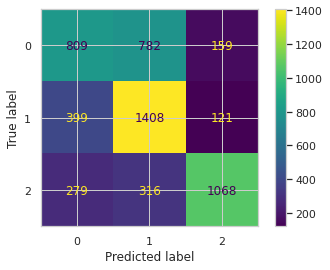

In [47]:
## Confusion Matrix for SVM (rbf kernel)
plot_confusion_matrix(SVM, Test_X_cv, y_test)  
plt.show()

## Prediction of Male - Female Gender (Remove Brand accounts)

In [48]:
## Remove Brand columns

mf_data = clean_data[clean_data['gender'] != 2]

In [49]:
## Remove Brand columns
mf_data.gender.value_counts()

1    6426
0    5831
Name: gender, dtype: int64

In [50]:
# split the dataset in train and test
X = mf_data['text_description']
y = mf_data['gender']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

X_train.head()
X_train.isnull().values.any() # To make sure there is no null value

False

In [51]:
## Using Count Vectorizer (BOW)
def identity_tokenizer(text):
    return text

cv = CountVectorizer(tokenizer=identity_tokenizer, stop_words='english', lowercase=False, max_features = 10000)

sparce_matrix = cv.fit(mf_data['text_description'])

Train_X_cv = sparce_matrix.transform(X_train)
Test_X_cv = sparce_matrix.transform(X_test)

In [52]:
# Support Vector Machine Implementation
### SVM with Linear kernel
SVM = svm.SVC(kernel='linear')
SVM.fit(Train_X_cv,y_train)

# predict the labels on validation dataset
predictions_SVM = SVM.predict(Test_X_cv)

## Reports
print("SVM - linear kernel Accuracy Score -> ",accuracy_score(predictions_SVM, y_test)*100)
print('Confusion matrix:\n',confusion_matrix(predictions_SVM, y_test))
print('Classification report:\n',classification_report(predictions_SVM, y_test))

SVM - linear kernel Accuracy Score ->  62.098966829798805
Confusion matrix:
 [[ 979  623]
 [ 771 1305]]
Classification report:
               precision    recall  f1-score   support

           0       0.56      0.61      0.58      1602
           1       0.68      0.63      0.65      2076

    accuracy                           0.62      3678
   macro avg       0.62      0.62      0.62      3678
weighted avg       0.63      0.62      0.62      3678



In [53]:
# Support Vector Machine Implementation
### SVM with Sigmoid kernel
SVM = svm.SVC(kernel='sigmoid')
SVM.fit(Train_X_cv,y_train)

# predict the labels on validation dataset
predictions_SVM = SVM.predict(Test_X_cv)

## Reports
print("SVM - sigmoid kenrel Accuracy Score -> ",accuracy_score(predictions_SVM, y_test)*100)
print('Confusion matrix:\n',confusion_matrix(predictions_SVM, y_test))
print('Classification report:\n',classification_report(predictions_SVM, y_test))

SVM - sigmoid kenrel Accuracy Score ->  63.73028820010875
Confusion matrix:
 [[ 939  523]
 [ 811 1405]]
Classification report:
               precision    recall  f1-score   support

           0       0.54      0.64      0.58      1462
           1       0.73      0.63      0.68      2216

    accuracy                           0.64      3678
   macro avg       0.63      0.64      0.63      3678
weighted avg       0.65      0.64      0.64      3678



In [54]:
# Support Vector Machine Implementation
### SVM with RBF kernel
SVM = svm.SVC(kernel='rbf')
SVM.fit(Train_X_cv,y_train)

# predict the labels on validation dataset
predictions_SVM = SVM.predict(Test_X_cv)

## Reports
print("SVM - rbf kernel Accuracy Score -> ",accuracy_score(predictions_SVM, y_test)*100)
print('Confusion matrix:\n',confusion_matrix(predictions_SVM, y_test))
print('Classification report:\n',classification_report(predictions_SVM, y_test))

SVM - rbf kernel Accuracy Score ->  64.98096791734639
Confusion matrix:
 [[ 923  461]
 [ 827 1467]]
Classification report:
               precision    recall  f1-score   support

           0       0.53      0.67      0.59      1384
           1       0.76      0.64      0.69      2294

    accuracy                           0.65      3678
   macro avg       0.64      0.65      0.64      3678
weighted avg       0.67      0.65      0.66      3678



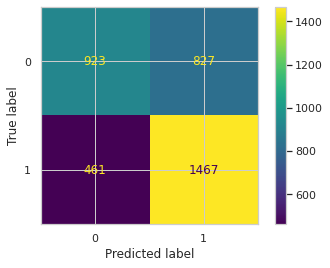

In [55]:
## Confusion Matrix for SVM (rbf kernel)
plot_confusion_matrix(SVM, Test_X_cv, y_test)  
plt.show()